In [1]:
import requests
import json
import matplotlib.pyplot as plt
import random

def GetLotto(start=1, end=9999):
    url = "https://www.dhlottery.co.kr/common.do?method=getLottoNumber&drwNo="
    jsonstr = ["drwtNo1", "drwtNo2", "drwtNo3", "drwtNo4", "drwtNo5", "drwtNo6", "bnusNo"]
    LottoNumber = dict()
    for i in range(start, end):
        req = requests.get(url+str(i))
        Lottojson = req.json()
        if Lottojson["returnValue"] == "fail":
            break
        LottoNumber[i] = [Lottojson[str] for str in jsonstr]
    return LottoNumber

def OddEven(NumList):
    return {"odd":[oddNum for oddNum in NumList if oddNum%2==1], "even":[evenNum for evenNum in NumList if evenNum%2==0]}

def Total(NumList):
    return sum(NumList)

def Color(NumListList):
    returnDict = {i:0 for i in range(1,45,10)}
    for NumList in NumListList:
        for Num in NumList[0:6]:
            returnDict[10*((Num-1)//10)+1] += 1
    return returnDict

def Number(NumListList):
    returnDict = {i:0 for i in range(1,46)}
    for NumList in NumListList:
        for Num in NumList[0:6]:
            returnDict[Num] += 1
    return returnDict

def NoBall(NumListList):
    returnList = [i for i in range(0,46)]
    for NumList in NumListList:
        for Num in NumList[0:6]:
            returnList[Num] = 0
    return [i for i in returnList if i != 0]

In [2]:
LottoNumber = GetLotto() #해당 APi 파싱은 오래 걸림.(약 1~2분 정도) 그래서 별도의 셀로 분리했음.

{1: 1329, 11: 1423, 21: 1306, 31: 1380, 41: 688}


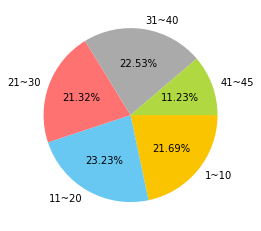

In [3]:
LottoColor = Color([LottoNumber[i][0:6] for i in range(1,len(LottoNumber)+1)])
print(LottoColor)
ratio = LottoColor.values()
labels = ['1~10', '11~20', '21~30', '31~40', '41~45']
color = ['#fbc400', '#69c8f2', '#ff7272', '#aaa', '#b0d840']
plt.pie(ratio, labels=labels, autopct='%.2f%%', counterclock=False, colors=color)
plt.show()

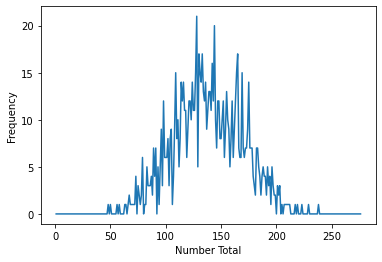

In [4]:
LottoNumberTotalList = [Total(LottoNumber[i][0:6]) for i in range(1,len(LottoNumber)+1)]
plt.plot([i for i in range(1,277)], [LottoNumberTotalList.count(i) for i in range(1, 277)])
plt.xlabel('Number Total')
plt.ylabel('Frequency')
plt.show()

[(34, 158), (18, 151), (27, 148), (12, 147), (17, 147), (13, 146)]
[(6, 126), (28, 125), (23, 124), (30, 123), (22, 116), (32, 114)]


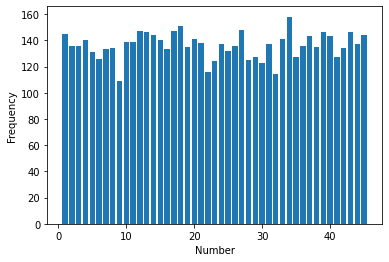

In [5]:
LottoNumberDict = Number([LottoNumber[i][0:6] for i in range(1,len(LottoNumber)+1)])
SortedDictList = sorted(LottoNumberDict.items(), key=lambda item: item[1], reverse=True)
print(SortedDictList[0:6])
print(SortedDictList[-7:-1])
plt.bar(range(1,46), [LottoNumberDict[i] for i in range(1,46)])
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

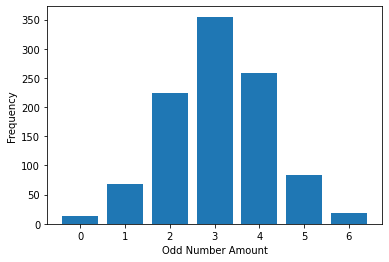

In [6]:
LottoOddList = [len(OddEven(LottoNumber[i][0:6])['odd']) for i in range(1, len(LottoNumber)+1)]
plt.bar(range(0,7), [LottoOddList.count(i) for i in range(7)])
plt.xlabel("Odd Number Amount")
plt.ylabel("Frequency")
plt.show()

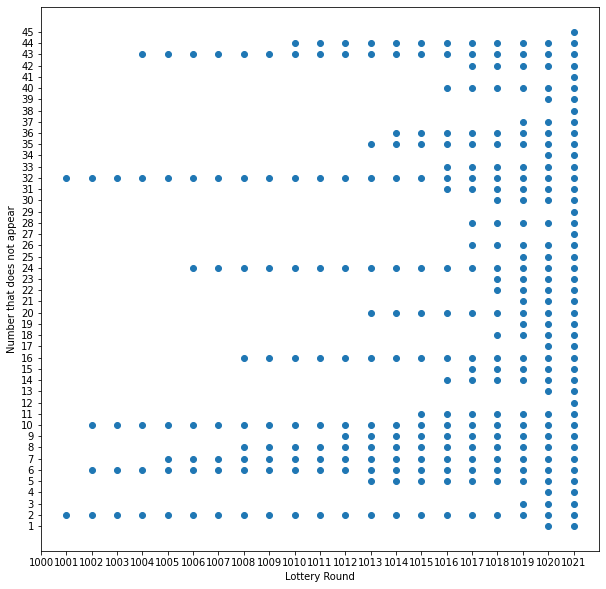

In [7]:
NoBallDict = dict()
for i in range(len(LottoNumber),0,-1):
    NoBallTemp = NoBall([LottoNumber[j][0:6] for j in range(i, len(LottoNumber))])
    NoBallDict[i] = NoBallTemp
    if NoBallTemp == []:
        break
plt.figure(figsize=(10,10))
plt.xticks([i for i in NoBallDict.keys()])
plt.yticks(range(1,46))
plt.xlabel("Lottery Round")
plt.ylabel("Number that does not appear")
plt.scatter(sum([[i]*len(j) for i, j in NoBallDict.items()], []), sum(NoBallDict.values(), []))
plt.show()

In [8]:
#3.1 색상 통계 확률에 따른 무작위
ColorRandomPer = sorted(random.sample(sum([[i]*j for i,j in LottoColor.items()], []), 6))
ColorRandom = []
for i in set(ColorRandomPer):
    ColorRandom += sorted(random.sample(range(i,(i+10 if i!=41 else 46)),ColorRandomPer.count(i)))
print(sorted(ColorRandom))

[1, 7, 9, 17, 19, 40]


In [9]:
#3.2 당첨번호의 합계에 따른 무작위
TotalRandomNum = random.choice(LottoNumberTotalList)
print(TotalRandomNum)
while True:
    TotalRandom = []
    TempComp = [item for item in range(1,46)]
    while len(TotalRandom) != 5:
        TotalRandom.append(random.choice(TempComp))
        TempComp = [item for item in range(1,46) if item not in TotalRandom]
        if sum(TotalRandom)+sum(TempComp[0:6-len(TotalRandom)])>TotalRandomNum or sum(TotalRandom)+sum(TempComp[-7+len(TotalRandom):-1])<TotalRandomNum:
            TotalRandom.pop()
    if TotalRandomNum-sum(TotalRandom) not in TotalRandom:
        TotalRandom.append(TotalRandomNum-sum(TotalRandom))
        break
print(sorted(TotalRandom))

188
[18, 26, 31, 34, 39, 40]


In [10]:
#3.3 당첨번호별 확률에 따른 무작위
NumberPer = sum([[i]*j for i,j in LottoNumberDict.items()], [])
NumberRandom = []
while len(NumberRandom) != 6:
    NumberRandom.append(random.choice(NumberPer))
    if NumberRandom[-1] in NumberRandom[0:-1]:
        NumberRandom.pop()
print(sorted(NumberRandom))

[5, 6, 20, 30, 39, 45]


In [11]:
#3.4 홀짝 확률에 따른 무작위
OddPer = random.choice(LottoOddList)
OddRandom = [i for i in random.sample(range(1,46,2), OddPer)] + [i for i in random.sample(range(2,45,2), 6-OddPer)]
print(sorted(OddRandom))

[1, 3, 24, 35, 37, 44]


In [12]:
#3.5 미출현 번호에 따른 무작위
for i in range(len(LottoNumber), 0, -1):
    NoBallRandomPool = NoBall([LottoNumber[j][0:6] for j in range(i, len(LottoNumber))])
    if len(NoBallRandomPool) < 6:
        NoBallRandomPool = NoBall([LottoNumber[j][0:6] for j in range(i+1, len(LottoNumber))])
        break
NoBallRandomPool = random.sample(NoBallRandomPool, 6)
print(sorted(NoBallRandomPool))

[2, 6, 7, 10, 32, 43]


In [13]:
#3.6 종합 통계에 따른 무작위
OddPer = random.choice(LottoOddList)
OddEvenList = [1]*OddPer+[0]*(6-OddPer)
NoBallRandomPool = NoBall([LottoNumber[j][0:6] for j in range(len(LottoNumber)-5, len(LottoNumber))])
random.shuffle(OddEvenList)
while True:
    TotalRandomNum = random.choice(LottoNumberTotalList)
    if TotalRandomNum%2 == OddPer%2:
        break
while True:
    TotalRandom = []
    TempComp = [item for item in NoBallRandomPool]
    while len(TotalRandom) != 5:
        TotalRandom.append(random.choice([i for i in TempComp if i%2==OddEvenList[len(TotalRandom)]]))
        TempComp = [item for item in NoBallRandomPool if item not in TotalRandom]
        if sum(TotalRandom)+sum(TempComp[0:6-len(TotalRandom)])>TotalRandomNum or sum(TotalRandom)+sum(TempComp[-7+len(TotalRandom):-1])<TotalRandomNum:
            TotalRandom.pop()
    if TotalRandomNum-sum(TotalRandom) not in TotalRandom and (TotalRandomNum-sum(TotalRandom))%2==OddEvenList[-1]:
        TotalRandom.append(TotalRandomNum-sum(TotalRandom))
        break
print(sorted(TotalRandom))

[7, 8, 11, 20, 24, 40]


In [14]:
#3.7 그냥 무작위
print(sorted(random.sample(range(1,46), 6)))

[5, 6, 12, 28, 32, 45]
